In [45]:
%matplotlib inline

In [ ]:







fig = mv.plotfig()

def count_occupied_positions(fasta_file):
    sequences = {}

    with open(fasta_file, 'r') as file:
        seq_name = None
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                seq_name = line[1:]
                sequences[seq_name] = ''
            elif seq_name:
                sequences[seq_name] += line

    occupied_counts = {}
    for name, seq in sequences.items():
        count = sum(1 for char in seq if char != '-' and char != ' ')
        occupied_counts[name] = count

    return occupied_counts



fasta_path = 'clustalw.fasta'  
results = count_occupied_positions(fasta_path)

for name, count in results.items():
    print(f'{name}: {count}')
    
    

sp|P54419|METK_BACSU: 400
sp|P0A817|METK_ECOLI: 384
tr|A0A0H5C8F2|A0A0H5C8F2_CYBJN: 385
sp|P19358|METK2_YEAST: 384
tr|B5ZBQ9|B5ZBQ9_UREU1: 376
sp|Q58605|METK_METJA: 406
sp|Q5JF22|METK_THEKO: 405
sp|Q8PWS4|METK_METMA: 398


Position:  165  -> Corrected Position:  []
Position:  181  -> Corrected Position:  [172]
Position:  182  -> Corrected Position:  [172, 188]
Position:  303  -> Corrected Position:  [172, 188, 189]
Position:  336  -> Corrected Position:  [172, 188, 189, 316]
Position:  370  -> Corrected Position:  [172, 188, 189, 316, 349]


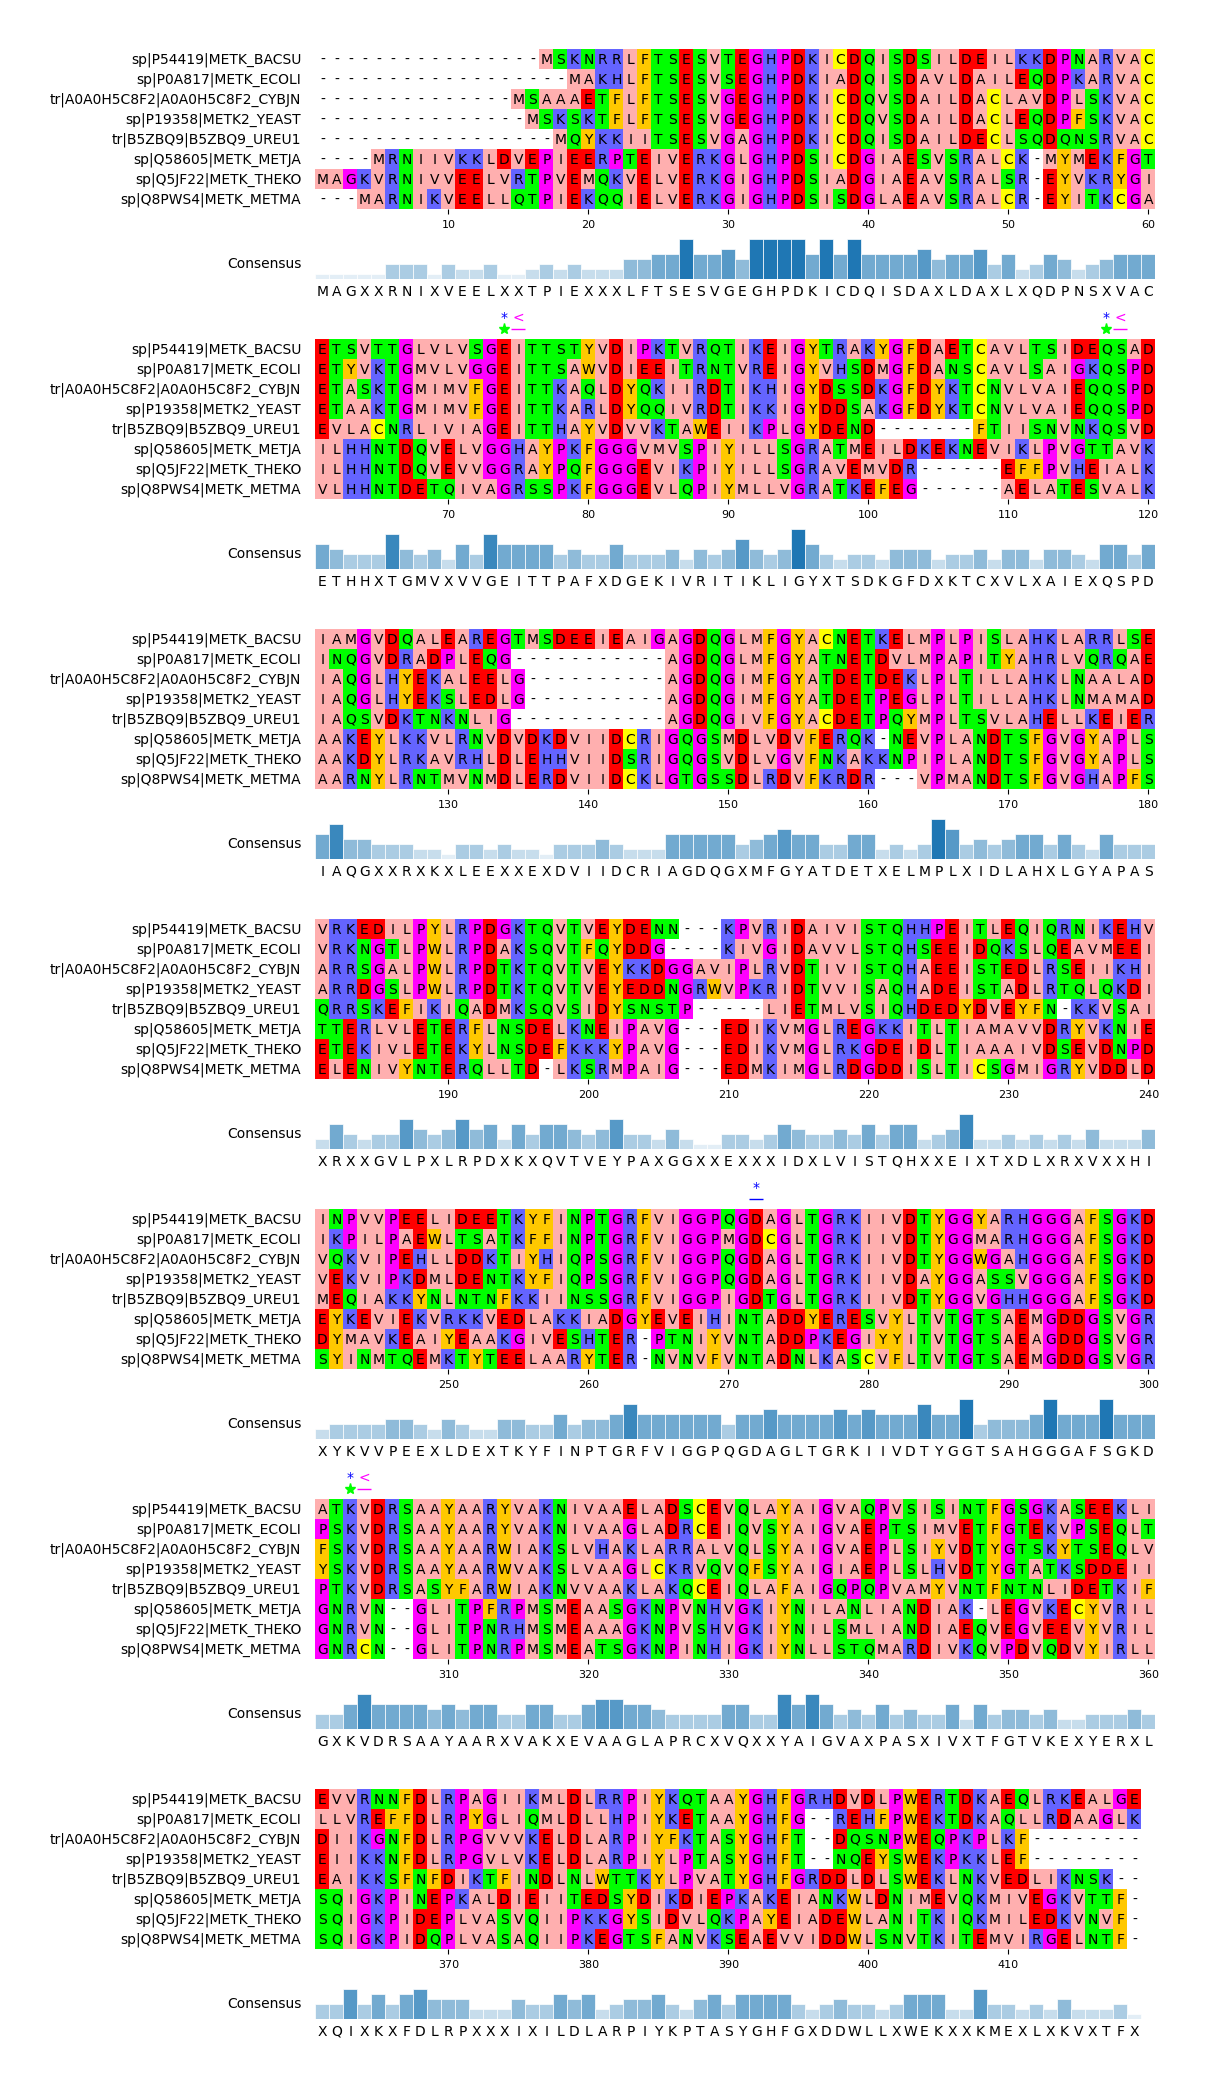

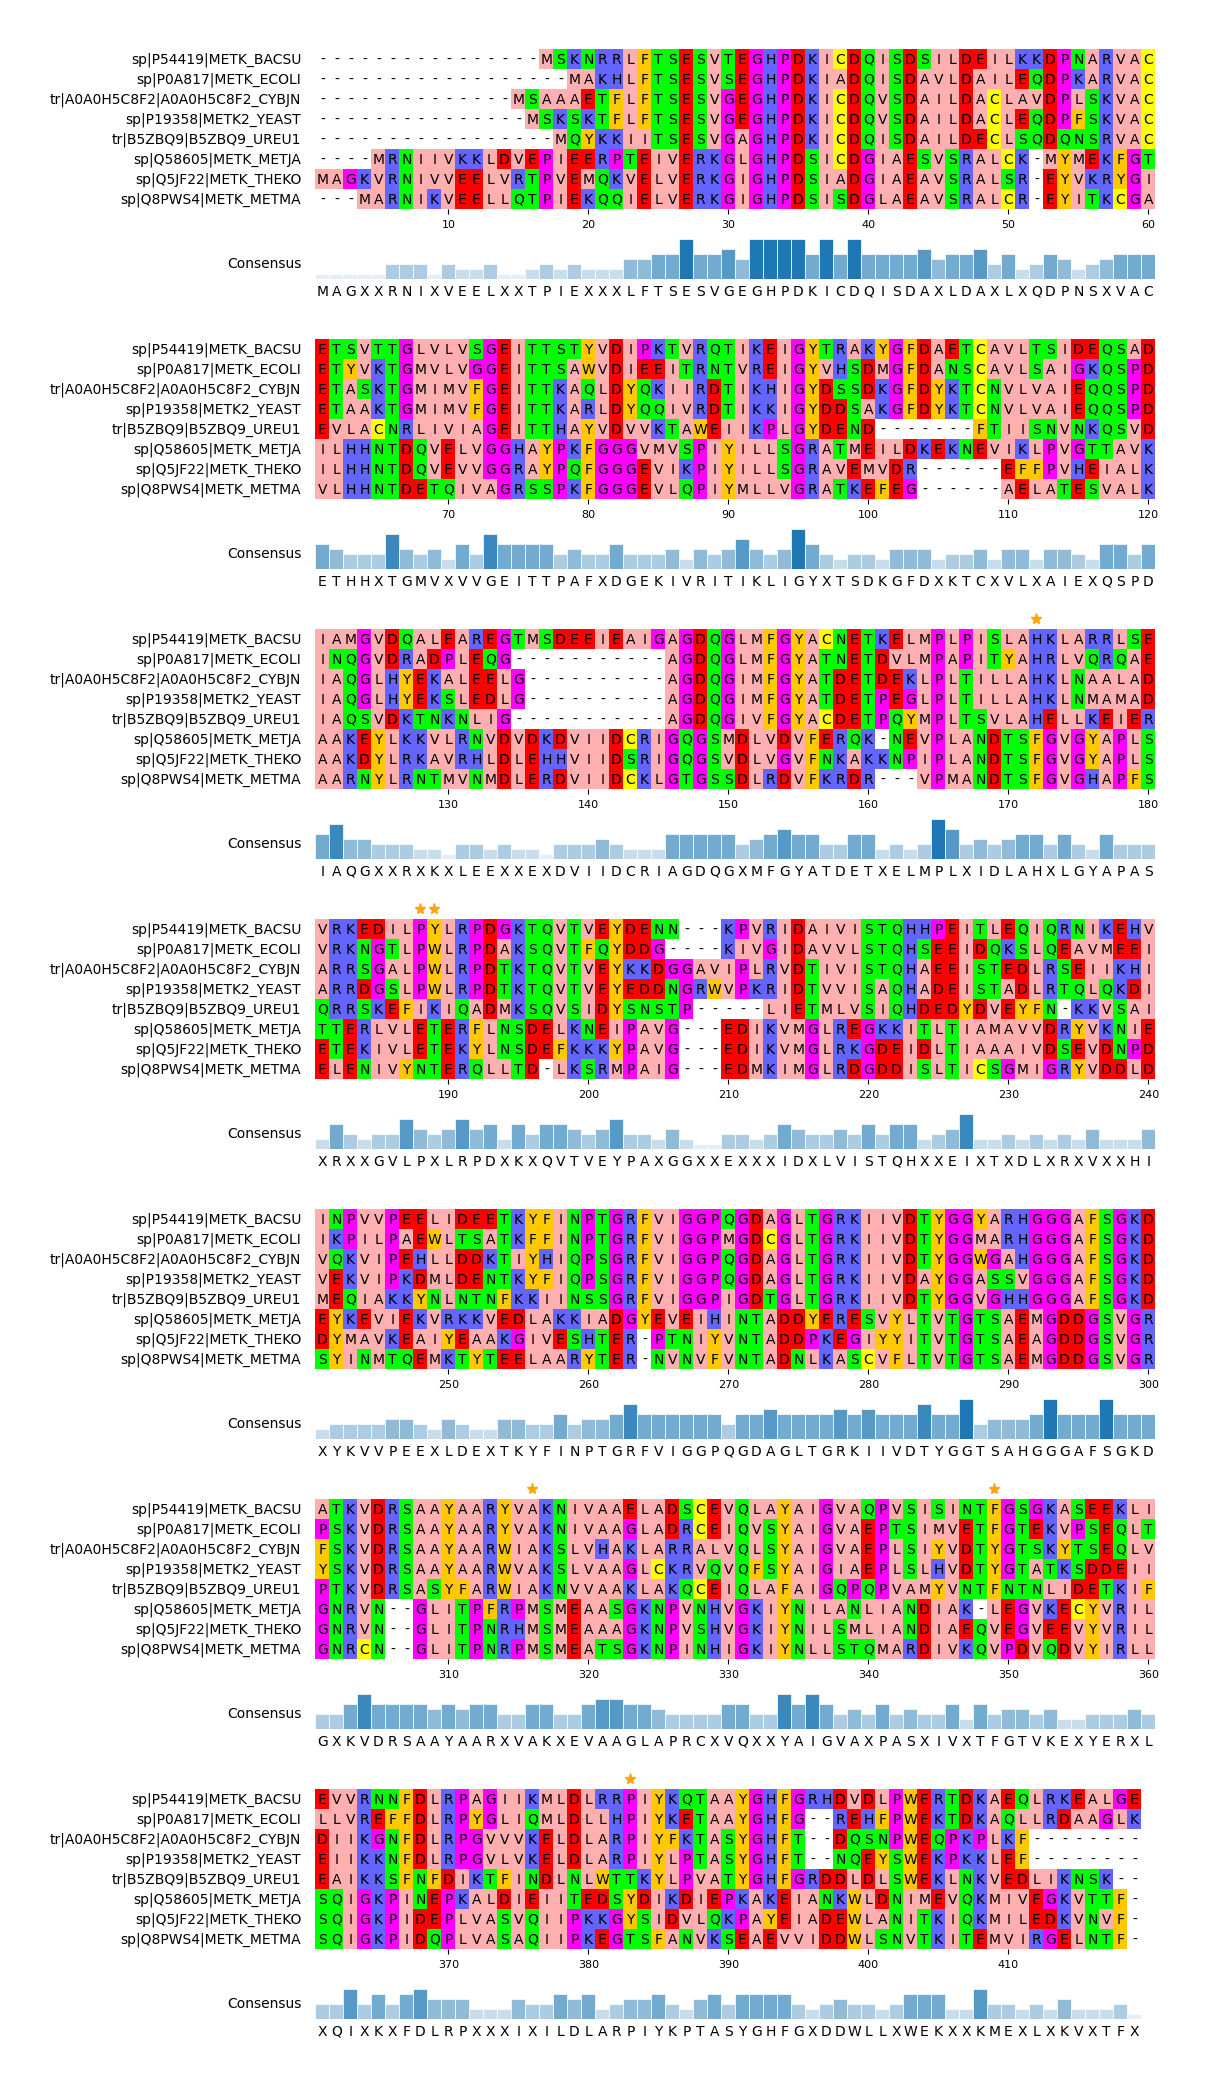

In [ ]:
from pymsaviz import MsaViz

msa_file = "clustalw.fasta"
mv = MsaViz(msa_file, start=1, end=419, wrap_length=60, show_consensus=True)
mv2 = MsaViz(msa_file, start=1, end=419, wrap_length=60, show_consensus=True)

bsmat = [] #BACSU
ecmat = [] #ECOLI
cumat = [] #CYBJN  #has NO binding sites!
scmat = [] #YEAST
uumat = [] #UREU #has NO binding sites!
mjmat = [] #METJA
tkmat = [] #THEKO
mmamat = [] #METMA

gap = []

def get_position(sequence):  #man kann es eigentlich löschen
    position = 0
    for char in sequence:
        if char == "-":
            position += 1 #es geht weiter
        if char != "-": 
            break
    return position     #nicht die Position sondern den Anzahl von gaps BIS position un dann von diese position dien anzahl 
                        #von gaps subtrahieren um die accurate poition zu finden

def tk_get_position(seq, pos_of_interest):
    count = 0

    for i in range(len(seq)):
        if count == pos_of_interest:
            return i
    
        if seq[i] != "-":
            count += 1

tkmat_id = "sp|Q5JF22|METK_THEKO" #tkmat
pos_of_interest = [165, 181, 182, 303, 336, 370] #plus 21
shift=21
shifted_pos= [pos+shift for pos in pos_of_interest] #for loop one line genauer anschauen, neue syntax
corr_pos= []
for sequence in mv._msa:
    if sequence.id == tkmat_id:
        for position in pos_of_interest:
            corrected_pos= tk_get_position(sequence.seq, position)
            print("Position: ", position, " -> Corrected Position: ", corr_pos)
            corr_pos.append(corrected_pos)


mv_add_bsmat = []
mv_add_ecmat = []
mv_add_scmat = []

for record in mv._msa:   #one record represents one species
    c = 0
    if record.id == "sp|P54419|METK_BACSU": #bsmat
        sequence = record.seq
        for i in range(len(sequence)):
            if sequence[i] != "-":
                bsmat.append(sequence[i])
            if sequence[i] == "-":
                c += 1
            
            if len(bsmat) == 58:
                mv_add_bsmat.append(58 + c)
            if len(bsmat) == 101:
                mv_add_bsmat.append(101 + c)
            if len(bsmat) == 284:
                mv_add_bsmat.append(284 + c)
                
    if record.id == "sp|P0A817|METK_ECOLI": #ecmat
        sequence = record.seq
        for i in range(len(sequence)):
            if sequence[i] != "-":
                ecmat.append(sequence[i])
            if sequence[i] == "-":
                c += 1
            if len(ecmat) == 56:
                mv_add_ecmat.append(56 + c)
                mv.add_text_annotation((56 + c + 1, 56 + c + 1), "<", text_color="magenta", range_color="magenta")
            if len(ecmat) == 99:
                mv_add_ecmat.append(99 + c)
                mv.add_text_annotation((99 + c + 1, 99 + c + 1), "<", text_color="magenta", range_color="magenta")
            if len(ecmat) == 270:
                mv_add_ecmat.append(270 + c)
                mv.add_text_annotation((270 + c + 1, 270 + c + 1), "<", text_color="magenta", range_color="magenta")
                
    if record.id == "sp|P19358|METK2_YEAST": #scmat
        sequence = record.seq
        for i in range(len(sequence)):
            if sequence[i] != "-":
                scmat.append(sequence[i])
            if sequence[i] == "-":
                c += 1
            if len(scmat) == 59:
                mv_add_scmat.append(59 + c)
                mv.add_text_annotation((59 + c, 59 + c), "*", text_color="blue", range_color = "blue")
            if len(scmat) == 102:
                mv_add_scmat.append(102 + c)
                mv.add_text_annotation((102 + c, 102 + c), "*", text_color="blue", range_color = "blue")
            if len(scmat) == 247:
                mv_add_scmat.append(247 + c)
                mv.add_text_annotation((247 + c, 247 + c), "*", text_color="blue", range_color = "blue")
            if len(scmat) == 278:
                mv_add_scmat.append(278 + c)
                mv.add_text_annotation((278 + c, 278 + c), "*", text_color="blue", range_color = "blue")

mv.add_markers(
    (mv_add_bsmat),
    color="lime",
    marker="*",
    size=8,
)

mv2.add_markers(
    (corr_pos),
    color="orange",
    marker="*",
    size=8,
)

"""         Nicht so alte Version, die mit add_text_annotation arbeitet
#c = 0          Hier mit c wird die Anzahl der Close Contacts gerechnet, so dass man 181 und 182 nicht doppelt annotieren muss und als Tuple annotieren kann
for pos in corr_pos :
    #if c != 2 | c != 3:
    mv2.add_text_annotation((pos, pos), "*", text_color="gold", range_color="gold")
    #if c == 2:
        #mv2.add_text_annotation((corr_pos[2], corr_pos[3]), "Close Contact", text_color="gold", range_color="gold")
    #if c == 3:
        #c += 1
        #continue
    #c += 1
"""

""" Alte Version, die 303 mit orange markiert
mv2.add_text_annotation((165, 165), "Close Contact", text_color="gold", range_color="gold")
mv2.add_text_annotation((181, 182), "Close Contact", text_color="gold", range_color="gold")
mv2.add_text_annotation((336, 336), "Close Contact", text_color="gold", range_color="gold")
mv2.add_text_annotation((370, 370), "Close Contact", text_color="gold", range_color="gold")
mv2.add_text_annotation((303, 303), "Close Contact", text_color="orange", range_color="orange")
"""

#mv.add_text_annotation((177, 179), "Binding Site", text_color="black", range_color="lime")
#purple und oraange nochmal anschauen (vll sind sie übereinander)
fig = mv.plotfig()
fig2 = mv2.plotfig()

fig.savefig("binding_sites_correct.png", dpi=300)
fig2.savefig("TEKHO.png", dpi=300)

#TEKHO: 165=L, 181=N, 182=D, 336=H, 370=I

In [ ]:
def get_position(seq, pos_of_interest):
    count = 0

    for i in range(len(seq)):
        if count == pos_of_interest:
            return i
    
        if seq[i] != "-":
            count += 1

tkmat_id = "sp|Q5JF22|METK_THEKO" #tkmat
pos_of_interest = [165, 181, 182, 303, 336, 370] #plus 21
shift=21
shifted_pos= [pos+shift for pos in pos_of_interest] #for loop one line genauer anschauen, neue syntax
corr_pos= []
for sequence in mv._msa:
    if sequence.id == tkmat_id:
        for position in pos_of_interest:
            corrected_pos= get_position(sequence.seq, position)
            print("Position: ", position, " -> Corrected Position: ", corr_pos)
            corr_pos.append(corrected_pos)


Position:  165  -> Corrected Position:  []
Position:  181  -> Corrected Position:  [172]
Position:  182  -> Corrected Position:  [172, 188]
Position:  303  -> Corrected Position:  [172, 188, 189]
Position:  336  -> Corrected Position:  [172, 188, 189, 316]
Position:  370  -> Corrected Position:  [172, 188, 189, 316, 349]


In [55]:
from pandamap import HybridProtLigMapper

mapper_test = HybridProtLigMapper("bsMAT-D-Methionine.pdb")
mapper_test.run_analysis()

Detecting interactions...
*** Using IMPROVED detection with stricter filtering ***
Before filtering: 31 total interactions
Calculating solvent accessibility...
Trying DSSP method first...
Error calculating solvent accessibility: 'HybridProtLigMapper' object has no attribute 'estimate_solvent_accessibility'
Falling back to realistic method
Using realistic solvent accessibility calculation...
Total protein atoms: 6188
Interacting residues to check: 26
Marking ('GLY', 178) as solvent accessible (score: 1.00)
Marking ('GLY', 248) as solvent accessible (score: 1.00)
Marking ('PHE', 245) as solvent accessible (score: 0.90)
Marking ('LYS', 179) as solvent accessible (score: 1.12)
Marking ('ASP', 104) as solvent accessible (score: 1.12)
Marking ('PRO', 18) as solvent accessible (score: 0.90)
Marking ('ASP', 177) as solvent accessible (score: 1.12)
Marking ('ASP', 253) as solvent accessible (score: 1.12)
Marking ('THR', 242) as solvent accessible (score: 1.12)
Marking ('SER', 102) as solvent ac

'bsMAT-D-Methionine_interactions.png'

In [ ]:
from pandamap import HybridProtLigMapper

# Basic initialization
mapperD = HybridProtLigMapper("tkMAT_D-SAM_cleaned.pdb", ligand_resname="DSA")
mapperL = HybridProtLigMapper("tkmat_L-SAM_cleaned.pdb", ligand_resname="LSA")

# Run full workflow and generate 2D image
print(" -> Hier ist der mapperD")
mapperD.run_analysis()
mapperD.visualize(output_file="interactions_D.png")

print("")
print(" -> Hier ist der mapperL")
mapperL.run_analysis()
mapperL.visualize(output_file="interactions_L.png")

mapperD
mapperL

 -> Hier ist der mapperD
Detecting interactions...
*** Using IMPROVED detection with stricter filtering ***
Before filtering: 33 total interactions
Calculating solvent accessibility...
Trying DSSP method first...
Error calculating solvent accessibility: 'HybridProtLigMapper' object has no attribute 'estimate_solvent_accessibility'
Falling back to realistic method
Using realistic solvent accessibility calculation...
Total protein atoms: 12534
Interacting residues to check: 30
Marking ('ASN', 181) as solvent accessible (score: 1.12)
Marking ('HIS', 336) as solvent accessible (score: 1.12)
Marking ('ILE', 222) as solvent accessible (score: 0.90)
Marking ('ASP', 86) as solvent accessible (score: 1.08)
Marking ('ILE', 289) as solvent accessible (score: 0.90)
Marking ('ALA', 240) as solvent accessible (score: 0.90)
Marking ('SER', 298) as solvent accessible (score: 1.08)
Marking ('ILE', 237) as solvent accessible (score: 0.90)
Marking ('TYR', 291) as solvent accessible (score: 1.12)
Marking 

In [36]:
for i in range(len(mapperD.interactions["hydrogen_bonds"])):
    print(f"Hydrogen bond {i+1}:")
    print("Protein residue:", mapperD.interactions["hydrogen_bonds"][i]["protein_residue"].__dict__)
mapperD.interactions["hydrogen_bonds"][i]["protein_residue"].__dict__.keys()

Hydrogen bond 1:
Protein residue: {'level': 'R', 'disordered': 0, 'resname': 'HIS', 'segid': '    ', 'internal_coord': None, '_id': (' ', 82, ' '), 'full_id': ('complex', 0, 'B', (' ', 82, ' ')), 'parent': <Chain id=B>, 'child_list': [<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>, <Atom CG>, <Atom CD2>, <Atom ND1>, <Atom CE1>, <Atom NE2>, <Atom H>, <Atom HA>, <Atom HB2>, <Atom HB3>, <Atom HD2>, <Atom HE1>, <Atom HE2>], 'child_dict': {'N': <Atom N>, 'CA': <Atom CA>, 'C': <Atom C>, 'O': <Atom O>, 'CB': <Atom CB>, 'CG': <Atom CG>, 'CD2': <Atom CD2>, 'ND1': <Atom ND1>, 'CE1': <Atom CE1>, 'NE2': <Atom NE2>, 'H': <Atom H>, 'HA': <Atom HA>, 'HB2': <Atom HB2>, 'HB3': <Atom HB3>, 'HD2': <Atom HD2>, 'HE1': <Atom HE1>, 'HE2': <Atom HE2>}, 'xtra': {}}
Hydrogen bond 2:
Protein residue: {'level': 'R', 'disordered': 0, 'resname': 'ASN', 'segid': '    ', 'internal_coord': None, '_id': (' ', 84, ' '), 'full_id': ('complex', 0, 'B', (' ', 84, ' ')), 'parent': <Chain id=B>, 'child_list': [<Atom N>, 

dict_keys(['level', 'disordered', 'resname', 'segid', 'internal_coord', '_id', 'full_id', 'parent', 'child_list', 'child_dict', 'xtra'])

In [ ]:
from pandamap import HybridProtLigMapper
import json

# TKMAT
mapperD = HybridProtLigMapper("tkMAT_D-SAM_cleaned.pdb", ligand_resname="DSA")
mapperL = HybridProtLigMapper("tkmat_L-SAM_cleaned.pdb", ligand_resname="LSA")

D_interactions_data = {}
L_interactions_data = {}

for interaction_type, interactions in mapperD.interactions.items():
    D_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        D_interactions_data[interaction_type].append(interaction_data)

for interaction_type, interactions in mapperL.interactions.items():
    L_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        L_interactions_data[interaction_type].append(interaction_data)

D_output_data = {
    "description_D": "These are the interactions for D-SAM",
    "D_interactions": D_interactions_data,
}

L_output_data = {
    "description_L": "These are the interactions for L-SAM",
    "L_interactions": L_interactions_data
}

with open("D_interactions.json", "w") as f:
    json.dump(D_output_data, f, indent=4)
with open("L_interactions.json", "w") as f:
    json.dump(L_output_data, f, indent=4) 

# BSMAT
bsmat_mapperD = HybridProtLigMapper("bsMAT-D-Methionine.pdb", ligand_resname="LIG3")
bsmat_mapperL = HybridProtLigMapper("bsMAT-L.pdb", ligand_resname="LIG3")
bsmat_D_interactions_data = {}
bsmat_L_interactions_data = {}
for interaction_type, interactions in bsmat_mapperD.interactions.items():
    bsmat_D_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        bsmat_D_interactions_data[interaction_type].append(interaction_data)
for interaction_type, interactions in bsmat_mapperL.interactions.items():
    bsmat_L_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        bsmat_L_interactions_data[interaction_type].append(interaction_data)
bsmat_D_output_data = {
    "description_D": "These are the interactions for D-SAM",
    "D_interactions": bsmat_D_interactions_data,
}
bsmat_L_output_data = {
    "description_L": "These are the interactions for L-SAM",
    "L_interactions": bsmat_L_interactions_data
}
with open("bsmat_D_interactions.json", "w") as f:
    json.dump(bsmat_D_output_data, f, indent=4)
with open("bsmat_L_interactions.json", "w") as f:
    json.dump(bsmat_L_output_data, f, indent=4)

# ECMAT
ecmat_mapperD = HybridProtLigMapper("ecMAT-D.pdb", ligand_resname="LIG3C")
ecmat_mapperL = HybridProtLigMapper("ecMAT-L.pdb", ligand_resname="LIG3C")
ecmat_D_interactions_data = {}
ecmat_L_interactions_data = {}
for interaction_type, interactions in ecmat_mapperD.interactions.items():
    ecmat_D_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        ecmat_D_interactions_data[interaction_type].append(interaction_data)
for interaction_type, interactions in ecmat_mapperL.interactions.items():
    ecmat_L_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        ecmat_L_interactions_data[interaction_type].append(interaction_data)
ecmat_D_output_data = {
    "description_D": "These are the interactions for D-SAM",
    "D_interactions": ecmat_D_interactions_data,
}
ecmat_L_output_data = {
    "description_L": "These are the interactions for L-SAM",
    "L_interactions": ecmat_L_interactions_data
}
with open("ecmat_D_interactions.json", "w") as f:
    json.dump(ecmat_D_output_data, f, indent=4)
with open("ecmat_L_interactions.json", "w") as f:
    json.dump(ecmat_L_output_data, f, indent=4)

# SCMAT
scmat_mapperD = HybridProtLigMapper("scMAT-D.pdb", ligand_resname="LIG3C")
scmat_mapperL = HybridProtLigMapper("scMAT-L.pdb", ligand_resname="LIG3C")
scmat_D_interactions_data = {}
scmat_L_interactions_data = {}
for interaction_type, interactions in scmat_mapperD.interactions.items():
    scmat_D_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        scmat_D_interactions_data[interaction_type].append(interaction_data)
for interaction_type, interactions in scmat_mapperL.interactions.items():
    scmat_L_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        scmat_L_interactions_data[interaction_type].append(interaction_data)
scmat_D_output_data = {
    "description_D": "These are the interactions for D-SAM",
    "D_interactions": scmat_D_interactions_data,
}
scmat_L_output_data = {
    "description_L": "These are the interactions for L-SAM",
    "L_interactions": scmat_L_interactions_data
}
with open("scmat_D_interactions.json", "w") as f:
    json.dump(scmat_D_output_data, f, indent=4)
with open("scmat_L_interactions.json", "w") as f:
    json.dump(scmat_L_output_data, f, indent=4)

# MJMAT
mjmat_mapperD = HybridProtLigMapper("mjMAT-D.pdb", ligand_resname="LIG3C")
mjmat_mapperL = HybridProtLigMapper("mjMAT-L.pdb", ligand_resname="LIG3C")
mjmat_D_interactions_data = {}
mjmat_L_interactions_data = {}
for interaction_type, interactions in mjmat_mapperD.interactions.items():
    mjmat_D_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        mjmat_D_interactions_data[interaction_type].append(interaction_data)
for interaction_type, interactions in mjmat_mapperL.interactions.items():   
    mjmat_L_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        mjmat_L_interactions_data[interaction_type].append(interaction_data)
mjmat_D_output_data = {
    "description_D": "These are the interactions for D-SAM",
    "D_interactions": mjmat_D_interactions_data,
}
mjmat_L_output_data = {
    "description_L": "These are the interactions for L-SAM",
    "L_interactions": mjmat_L_interactions_data
}
with open("mjmat_D_interactions.json", "w") as f:
    json.dump(mjmat_D_output_data, f, indent=4)
with open("mjmat_L_interactions.json", "w") as f:
    json.dump(mjmat_L_output_data, f, indent=4)

# UUMAT
uumat_mapperD = HybridProtLigMapper("uuMAT-D.pdb", ligand_resname="LIG3C")
uumat_mapperL = HybridProtLigMapper("uuMAT-L.pdb", ligand_resname="LIG3C")
uumat_D_interactions_data = {}
uumat_L_interactions_data = {}
for interaction_type, interactions in uumat_mapperD.interactions.items():
    uumat_D_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        uumat_D_interactions_data[interaction_type].append(interaction_data)
for interaction_type, interactions in uumat_mapperL.interactions.items():
    uumat_L_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        uumat_L_interactions_data[interaction_type].append(interaction_data)
uumat_D_output_data = {
    "description_D": "These are the interactions for D-SAM",
    "D_interactions": uumat_D_interactions_data,
}
uumat_L_output_data = {
    "description_L": "These are the interactions for L-SAM",
    "L_interactions": uumat_L_interactions_data
}
with open("uumat_D_interactions.json", "w") as f:
    json.dump(uumat_D_output_data, f, indent=4)
with open("uumat_L_interactions.json", "w") as f:
    json.dump(uumat_L_output_data, f, indent=4)

# MMAMAT
mmamat_mapperD = HybridProtLigMapper("mmMAT-D.pdb", ligand_resname="LIG3C")
mmamat_mapperL = HybridProtLigMapper("mmMAT-L.pdb", ligand_resname="LIG3C")
mmamat_D_interactions_data = {}
mmamat_L_interactions_data = {}
for interaction_type, interactions in mmamat_mapperD.interactions.items():
    mmamat_D_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        mmamat_D_interactions_data[interaction_type].append(interaction_data)
for interaction_type, interactions in mmamat_mapperL.interactions.items():
    mmamat_L_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        mmamat_L_interactions_data[interaction_type].append(interaction_data)
mmamat_D_output_data = {
    "description_D": "These are the interactions for D-SAM",
    "D_interactions": mmamat_D_interactions_data,
}
mmamat_L_output_data = {
    "description_L": "These are the interactions for L-SAM",
    "L_interactions": mmamat_L_interactions_data
}
with open("mmamat_D_interactions.json", "w") as f:
    json.dump(mmamat_D_output_data, f, indent=4)
with open("mmamat_L_interactions.json", "w") as f:
    json.dump(mmamat_L_output_data, f, indent=4)

# CUMAT
cumat_mapperD = HybridProtLigMapper("cuMAT-D.pdb", ligand_resname="LIG3C")
cumat_mapperL = HybridProtLigMapper("cuMAT-L.pdb", ligand_resname="LIG3C")
cumat_D_interactions_data = {}
cumat_L_interactions_data = {}
for interaction_type, interactions in cumat_mapperD.interactions.items():
    cumat_D_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        cumat_D_interactions_data[interaction_type].append(interaction_data)
for interaction_type, interactions in cumat_mapperL.interactions.items():
    cumat_L_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        cumat_L_interactions_data[interaction_type].append(interaction_data)
cumat_D_output_data = {
    "description_D": "These are the interactions for D-SAM",
    "D_interactions": cumat_D_interactions_data,
}
cumat_L_output_data = {
    "description_L": "These are the interactions for L-SAM",
    "L_interactions": cumat_L_interactions_data
}
with open("cumat_D_interactions.json", "w") as f:
    json.dump(cumat_D_output_data, f, indent=4)
with open("cumat_L_interactions.json", "w") as f:
    json.dump(cumat_L_output_data, f, indent=4)



FileNotFoundError: [Errno 2] No such file or directory: 'tkMAT_D-SAM_cleaned.pdb'

In [1]:
import sys
print(sys.executable)

/Users/imanbelkis/miniconda3/envs/mat/bin/python


fatal: destination path 'structure-align' already exists and is not an empty directory.
📁 Reference structure loaded: 12602 atoms
📁 Mobile structure loaded: 6334 atoms
🧬 Reference chains: 3 segments
🧬 Mobile chains: 4 segments
🔄 Performing structural alignment...
Sequence alignment score: 783.5
Matched reference residue IDs: [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173

/var/folders/2g/6d10rccx1ln2rflhq76v6q6r0000gn/T/ipykernel_26058/704378808.py:72: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



✅ Static plot saved as 'static_alignment_plot.png'
✅ Interactive plot saved as 'interactive_alignment_plot.html'

🎉 All results exported successfully!
📁 Check the current directory for output files
📁 Reference structure loaded: 12565 atoms
📁 Mobile structure loaded: 6334 atoms
🧬 Reference chains: 3 segments
🧬 Mobile chains: 4 segments
🔄 Performing structural alignment for L-SAM complex...
Sequence alignment score: 783.5
Matched reference residue IDs: [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 

/var/folders/2g/6d10rccx1ln2rflhq76v6q6r0000gn/T/ipykernel_26058/704378808.py:161: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




🎉 All L-SAM results exported successfully!
📁 Check the current directory for L-SAM output files


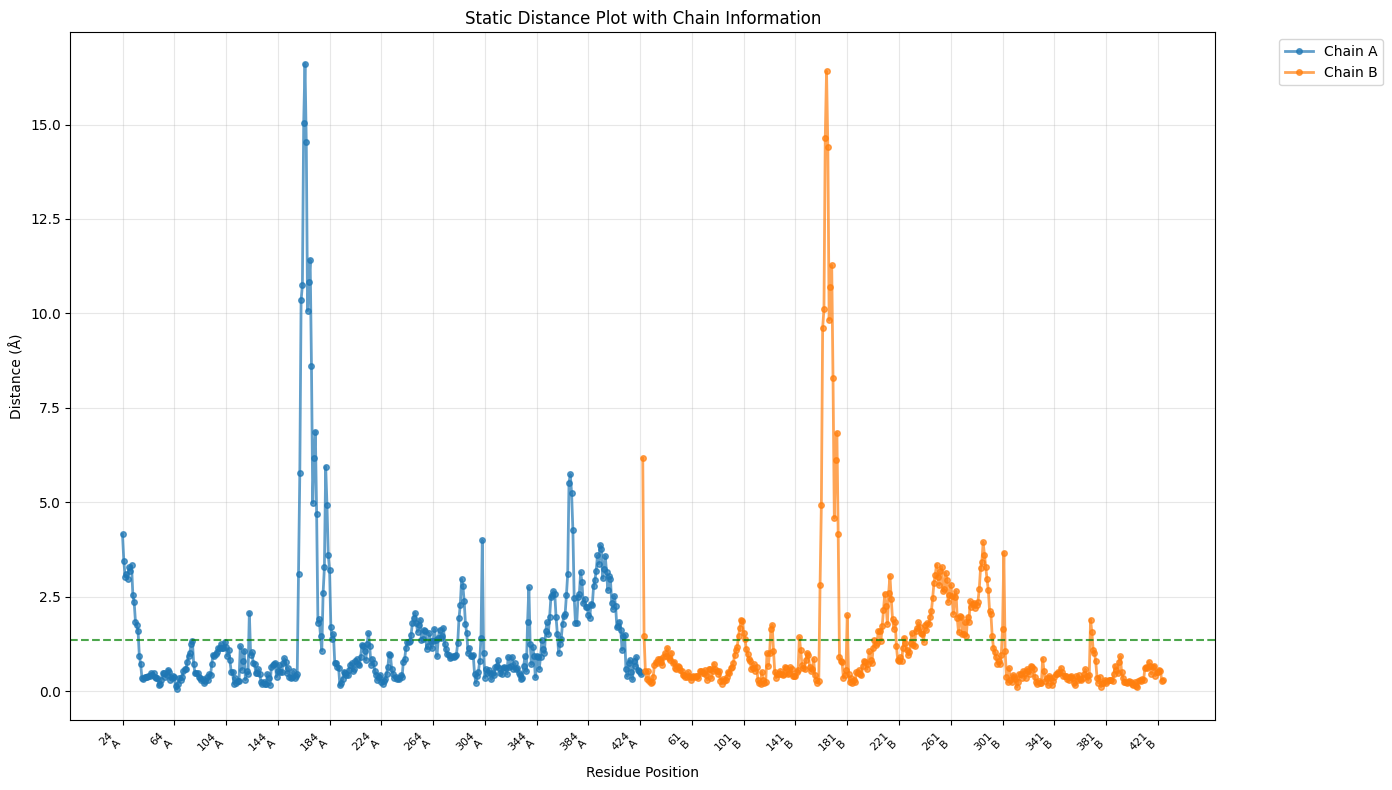

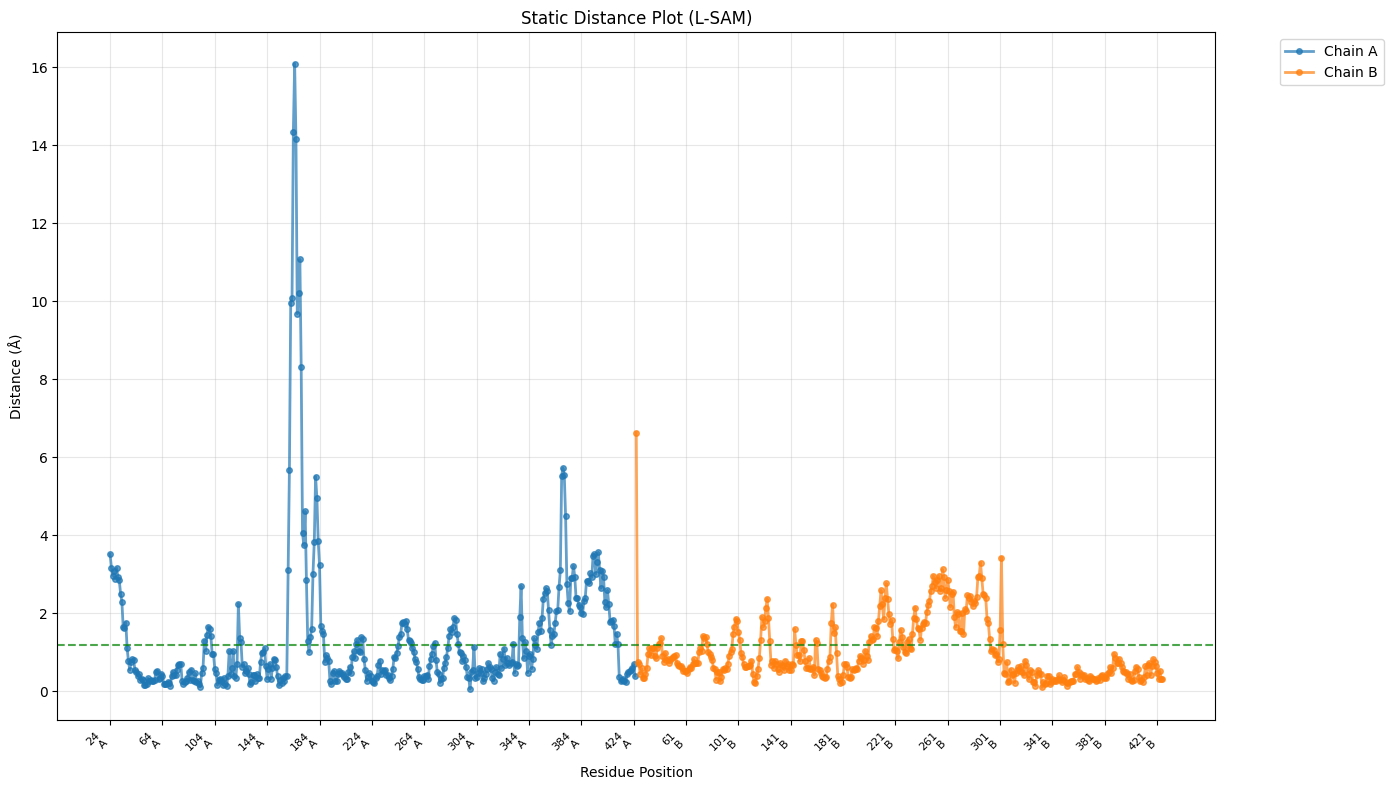

In [ ]:
!git clone https://github.com/PyEED/structure-align.git

import sys
sys.path.append("structure-align/structurealign")


import MDAnalysis as mda
from structurealign import StructuralAligner
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

try:
    reference = mda.Universe("tkMAT_D-SAM_cleaned.pdb")  # Reference structure
    mobile = mda.Universe("tkMAT-D.pdb")  # Mobile structure

    print(f"📁 Reference structure loaded: {len(reference.atoms)} atoms")
    print(f"📁 Mobile structure loaded: {len(mobile.atoms)} atoms")
    print(f"🧬 Reference chains: {len(reference.segments)} segments")
    print(f"🧬 Mobile chains: {len(mobile.segments)} segments")

except FileNotFoundError as e:
    print(f"❌ File not found: {e}")
    print("💡 Please place your PDB files in the current directory")
    print("💡 Or modify the file paths in the cell above")
    
# Initialize the structural aligner with verbose output
aligner = StructuralAligner(verbose=True)

print("🔄 Performing structural alignment...")
print("=" * 50)

# Perform alignment using CA atoms (default)
result = aligner.align(reference, mobile, selection="name CA")

print("=" * 50)
print("✅ Alignment completed!")

print("📊 ALIGNMENT RESULTS")
print("=" * 40)
print(f"RMSD before alignment: {result.rmsd_before:.2f} Å")
print(f"RMSD after alignment:  {result.rmsd_after:.2f} Å")
print(f"Number of aligned residues: {result.n_aligned_residues}")
print(f"Sequence alignment score: {result.sequence_alignment.alignment_score:.1f}")

# Calculate improvement
improvement = result.rmsd_before - result.rmsd_after
improvement_pct = (improvement / result.rmsd_before) * 100
print(f"\n📈 RMSD improvement: {improvement:.2f} Å ({improvement_pct:.1f}%)")

print("🧬 SEQUENCE ALIGNMENT")
print("=" * 40)
print(f"Reference: {result.sequence_alignment.reference_sequence}")
print(f"Mobile:    {result.sequence_alignment.mobile_sequence}")

# Show gaps in alignment
ref_gaps = result.sequence_alignment.reference_sequence.count("-")
mob_gaps = result.sequence_alignment.mobile_sequence.count("-")
print("\n📊 Alignment gaps:")
print(f"   Reference gaps: {ref_gaps}")
print(f"   Mobile gaps: {mob_gaps}")
print(f"   Total alignment length: {len(result.sequence_alignment.reference_sequence)}")

# Get the complete DataFrame
df = result.get_residue_info_table()
df

# Create static plot with chain information
fig_static = aligner.plot_distances(
    result, title="Static Distance Plot with Chain Information", figsize=(14, 8)
)
fig_static.show()
print("🎯 Creating interactive Plotly plot...")

# Create interactive plot with rich hover information
fig_interactive = aligner.plot_distances_interactive(
    result,
    title="Interactive Distance Plot with Rich Hover Info",
    height=700,
    width=1200,
)

# Display the interactive plot
fig_interactive

# Save DataFrame to CSV
df.to_csv("alignment_results.csv", index=False)
print("✅ DataFrame saved as 'alignment_results.csv'")

# Save static plot
fig_static.savefig("static_alignment_plot.png", dpi=300, bbox_inches="tight")
print("✅ Static plot saved as 'static_alignment_plot.png'")

# Save interactive plot as HTML
fig_interactive.write_html("interactive_alignment_plot.html")
print("✅ Interactive plot saved as 'interactive_alignment_plot.html'")

print("\n🎉 All results exported successfully!")
print("📁 Check the current directory for output files")


try:
    reference_L = mda.Universe("tkMAT_L-SAM_cleaned.pdb")  # Reference structure for L-SAM
    mobile_L = mda.Universe("tkMAT-L.pdb")  # Mobile structure for L form

    print(f"📁 Reference structure loaded: {len(reference_L.atoms)} atoms")
    print(f"📁 Mobile structure loaded: {len(mobile_L.atoms)} atoms")
    print(f"🧬 Reference chains: {len(reference_L.segments)} segments")
    print(f"🧬 Mobile chains: {len(mobile_L.segments)} segments")

except FileNotFoundError as e:
    print(f"❌ File not found: {e}")
    print("💡 Please place your PDB files in the current directory")
    print("💡 Or modify the file paths in the cell above")

# Initialize the structural aligner
aligner_L = StructuralAligner(verbose=True)

print("🔄 Performing structural alignment for L-SAM complex...")
print("=" * 50)

# Perform alignment using CA atoms
result_L = aligner_L.align(reference_L, mobile_L, selection="name CA")

print("=" * 50)
print("✅ Alignment for L-SAM completed!")

# Output alignment metrics
print("📊 ALIGNMENT RESULTS (L-SAM)")
print("=" * 40)
print(f"RMSD before alignment: {result_L.rmsd_before:.2f} Å")
print(f"RMSD after alignment:  {result_L.rmsd_after:.2f} Å")
print(f"Number of aligned residues: {result_L.n_aligned_residues}")
print(f"Sequence alignment score: {result_L.sequence_alignment.alignment_score:.1f}")

improvement_L = result_L.rmsd_before - result_L.rmsd_after
improvement_pct_L = (improvement_L / result_L.rmsd_before) * 100
print(f"\n📈 RMSD improvement: {improvement_L:.2f} Å ({improvement_pct_L:.1f}%)")

print("🧬 SEQUENCE ALIGNMENT")
print("=" * 40)
print(f"Reference: {result_L.sequence_alignment.reference_sequence}")
print(f"Mobile:    {result_L.sequence_alignment.mobile_sequence}")

# Show alignment gaps
ref_gaps_L = result_L.sequence_alignment.reference_sequence.count("-")
mob_gaps_L = result_L.sequence_alignment.mobile_sequence.count("-")
print("\n📊 Alignment gaps:")
print(f"   Reference gaps: {ref_gaps_L}")
print(f"   Mobile gaps: {mob_gaps_L}")
print(f"   Total alignment length: {len(result_L.sequence_alignment.reference_sequence)}")

# Export data
df_L = result_L.get_residue_info_table()
df_L

# Plot static and interactive distance differences
fig_static_L = aligner_L.plot_distances(
    result_L, title="Static Distance Plot (L-SAM)", figsize=(14, 8)
)
fig_static_L.show()
print("🎯 Creating interactive Plotly plot...")

fig_interactive_L = aligner_L.plot_distances_interactive(
    result_L,
    title="Interactive Distance Plot (L-SAM)",
    height=700,
    width=1200,
)

# Display interactive plot
fig_interactive_L

# Save results
df_L.to_csv("alignment_results_LSAM.csv", index=False)
fig_static_L.savefig("static_alignment_plot_LSAM.png", dpi=300, bbox_inches="tight")
fig_interactive_L.write_html("interactive_alignment_plot_LSAM.html")

print("\n🎉 All L-SAM results exported successfully!")
print("📁 Check the current directory for L-SAM output files")



In [ ]:
#al meu facut de mine, NU
import os
import json
import matplotlib.pyplot as plt
from collections import Counter
from Bio.PDB import MMCIFParser, PDBIO
from pandamap import HybridProtLigMapper
from pandamap import HybridProtLigMapper


def mapper_and_json(pdb_L, pdb_D, ligand_L, ligand_D, output_prefix):
    mapperL = HybridProtLigMapper(pdb_L, ligand_resname=ligand_L)
    mapperD = HybridProtLigMapper(pdb_D, ligand_resname=ligand_D)

    mapperL.run_analysis()
    mapperD.run_analysis()

    L_data = {}
    D_data = {}

    for interaction_type, interactions in mapperL.interactions.items():
        L_data[interaction_type] = []
        for interaction in interactions:
            res = interaction["protein_residue"].__dict__
            chain = res.get("parent").__dict__.get("_id")
            interaction_data = {
                "resname": res.get("resname"),
                "position": res.get("_id")[1],
                "chain": chain
            }
            L_data[interaction_type].append(interaction_data)
    for interaction_type, interactions in mapperD.interactions.items():
        D_data[interaction_type] = []
        for interaction in interactions:
            res = interaction["protein_residue"].__dict__
            chain = res.get("parent").__dict__.get("_id")
            interaction_data = {
                "resname": res.get("resname"),
                "position": res.get("_id")[1],
                "chain": chain
            }
            D_data[interaction_type].append(interaction_data)

    L_output = {
        f"description_L": f"These are the interactions for {ligand_L}",
        "L_interactions": L_data
    }
    D_output = {
        f"description_D": f"These are the interactions for {ligand_D}",
        "D_interactions": D_data
    }

    with open(f"{output_prefix}_L_interactions.json", "w") as f:
        json.dump(L_output, f, indent=4)
    with open(f"{output_prefix}_D_interactions.json", "w") as f:
        json.dump(D_output, f, indent=4)




def extract_residue_counts_from_json(json_file, key):
    with open(json_file) as f:
        data = json.load(f)
    counter = Counter()
    for interactions in data[key].values():
        for item in interactions:
            counter[item["resname"]] += 1
    return counter


def plot_histogram(counter_L, counter_D):
    all_keys = sorted(set(counter_L.keys()).union(set(counter_D.keys())))
    L_values = [counter_L.get(k, 0) for k in all_keys]
    D_values = [counter_D.get(k, 0) for k in all_keys]

    x = range(len(all_keys))
    width = 0.35
    
    plt.figure(figsize=(14, 6))
    plt.bar([i - width/2 for i in x], L_values, width=width, label='L', color='blue')
    plt.bar([i + width/2 for i in x], D_values, width=width, label='D', color='magenta')

    plt.xlabel("Amino Acid (resname)")
    plt.ylabel("Frequency in Interactions")
    plt.title("Frequency of Amino Acids in L vs D Interactions (All Species)")
    plt.xticks(x, all_keys, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig("all_species_interaction_histogram.png")
    plt.close()


if __name__ == "__main__":
    species = ["tkMAT", "bsMAT", "cuMAT", "ecMAT", "mjMAT", "mmaMAT", "uuMAT", "scMAT"]
    counter_L_total = Counter()
    counter_D_total = Counter()

    for specie in species:
        if specie == "tkMAT":
            counter_L = extract_residue_counts_from_json("L_interactions.json", key="L_interactions")
            counter_D = extract_residue_counts_from_json("D_interactions.json", key="D_interactions")
        else:
            cif_L = os.path.join("predicted_L", f"{specie}_L.cif")
            cif_D = os.path.join("predicted_D", f"{specie}_D.cif")
            pdb_L = f"{specie}_L.pdb"
            pdb_D = f"{specie}_D.pdb"
            ligand = "LIG3"

            convert_cif_to_pdb(cif_L, pdb_L)
            convert_cif_to_pdb(cif_D, pdb_D)
            mapper_and_json(pdb_L, pdb_D, ligand_L=ligand, ligand_D=ligand, output_prefix=specie)

            counter_L = extract_residue_counts_from_json(f"{specie}_L_interactions.json", key="L_interactions")
            counter_D = extract_residue_counts_from_json(f"{specie}_D_interactions.json", key="D_interactions")

        counter_L_total.update(counter_L)
        counter_D_total.update(counter_D)

    plot_histogram(counter_L_total, counter_D_total) 
 
 
"""

 # TKMAT
mapperD = HybridProtLigMapper("tkMAT_D-SAM_cleaned.pdb", ligand_resname="DSA")
mapperL = HybridProtLigMapper("tkmat_L-SAM_cleaned.pdb", ligand_resname="LSA")

D_interactions_data = {}
L_interactions_data = {}

for interaction_type, interactions in mapperD.interactions.items():
    D_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        D_interactions_data[interaction_type].append(interaction_data)

for interaction_type, interactions in mapperL.interactions.items():
    L_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        L_interactions_data[interaction_type].append(interaction_data)

D_output_data = {
    "description_D": "These are the interactions for D-SAM",
    "D_interactions": D_interactions_data,
}

L_output_data = {
    "description_L": "These are the interactions for L-SAM",
    "L_interactions": L_interactions_data
}

with open("D_interactions.json", "w") as f:
    json.dump(D_output_data, f, indent=4)
with open("L_interactions.json", "w") as f:
    json.dump(L_output_data, f, indent=4)  
    
# BSMAT genau wie tkMAT

cif_L = "bsMAT_D.cif"
cif_D = "bsMAT_L.cif"
pdb_L = "bsMAT_L.pdb"
pdb_D = "bsMAT_D.pdb"
ligand = "LIG3"

convert_cif_to_pdb(cif_L, pdb_L)
convert_cif_to_pdb(cif_D, pdb_D)
run_mapper_and_save_json(pdb_L, pdb_D, ligand_L=ligand, ligand_D=ligand, output_prefix=specie)

counter_L = extract_residue_counts_from_json("bsMAT_L_interactions.json", key="L_interactions")
counter_D = extract_residue_counts_from_json("bsMAT_D_interactions.json", key="D_interactions")

mapperD_bs = HybridProtLigMapper("bsMAT_D.pdb", ligand_resname="LIG3")
mapperL_bs = HybridProtLigMapper("bsMAT_D.pdb", ligand_resname="LIG3")

D_interactions_data_bs = {}
L_interactions_data_bs = {}

for interaction_type, interactions in mapperD.interactions.items():
    D_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        D_interactions_data[interaction_type].append(interaction_data)
        
for interaction_type, interactions in mapperL.interactions.items():
    L_interactions_data[interaction_type] = []
    for interaction in interactions:
        protein_residue = interaction["protein_residue"].__dict__
        ligand_atom = interaction["ligand_atom"].__dict__

        interaction_data = {
            "resname": protein_residue.get("resname"),
            "position": protein_residue.get("_id")[1],
            "chain": protein_residue.get("parent").__dict__.get("_id")
        }

        L_interactions_data[interaction_type].append(interaction_data)

D_output_data = {
    "description_D": "These are the interactions for D-SAM",
    "D_interactions": D_interactions_data,
}

L_output_data = {
    "description_L": "These are the interactions for L-SAM",
    "L_interactions": L_interactions_data
}

with open("D_interactions.json", "w") as f:
    json.dump(D_output_data, f, indent=4)
with open("L_interactions.json", "w") as f:
    json.dump(L_output_data, f, indent=4)   """
    
    
    

    
    

ValueError: invalid literal for int() with base 10: 'C'

In [30]:
import pandamap
mapperL = HybridProtLigMapper("predicted_D/bsMAT_D.cif", ligand_resname="LIG3")



In [ ]:
#da
import os
import json
import matplotlib.pyplot as plt
from collections import Counter
from pandamap import HybridProtLigMapper


def mapper_and_json(cif_L, cif_D, ligand_L, ligand_D, output_prefix):
    mapperL = HybridProtLigMapper(cif_L, ligand_resname=ligand_L)
    mapperD = HybridProtLigMapper(cif_D, ligand_resname=ligand_D)

    mapperL.run_analysis()
    mapperD.run_analysis()

    L_data = {}
    D_data = {}

    for interaction_type, interactions in mapperL.interactions.items():
        L_data[interaction_type] = []
        for interaction in interactions:
            res = interaction["protein_residue"].__dict__
            chain = res.get("parent").__dict__.get("_id")
            interaction_data = {
                "resname": res.get("resname"),
                "position": res.get("_id")[1],
                "chain": chain
            }
            L_data[interaction_type].append(interaction_data)

    for interaction_type, interactions in mapperD.interactions.items():
        D_data[interaction_type] = []
        for interaction in interactions:
            res = interaction["protein_residue"].__dict__
            chain = res.get("parent").__dict__.get("_id")
            interaction_data = {
                "resname": res.get("resname"),
                "position": res.get("_id")[1],
                "chain": chain
            }
            D_data[interaction_type].append(interaction_data)

    L_output = {
        f"description_L": f"These are the interactions for {ligand_L}",
        "L_interactions": L_data
    }
    D_output = {
        f"description_D": f"These are the interactions for {ligand_D}",
        "D_interactions": D_data
    }

    with open(f"{output_prefix}_L_interactions.json", "w") as f:
        json.dump(L_output, f, indent=4)
    with open(f"{output_prefix}_D_interactions.json", "w") as f:
        json.dump(D_output, f, indent=4)


def extract_residue_counts_from_json(json_file, key):
    with open(json_file) as f:
        data = json.load(f)
    counter = Counter()
    for interactions in data[key].values():
        for item in interactions:
            counter[item["resname"]] += 1
    return counter


def plot_histogram(counter_L, counter_D):
    all_keys = sorted(set(counter_L.keys()).union(set(counter_D.keys())))
    L_values = [counter_L.get(k, 0) for k in all_keys]
    D_values = [counter_D.get(k, 0) for k in all_keys]

    x = range(len(all_keys))
    width = 0.35
    
    plt.figure(figsize=(14, 6))
    plt.bar([i - width/2 for i in x], L_values, width=width, label='L', color='blue')
    plt.bar([i + width/2 for i in x], D_values, width=width, label='D', color='magenta')

    plt.xlabel("Amino Acid (resname)")
    plt.ylabel("Frequency in Interactions")
    plt.title("Frequency of Amino Acids in L vs D Interactions (All Species)")
    plt.xticks(x, all_keys, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig("all_species_interaction_histogram.png")
    plt.close()


if __name__ == "__main__":
    species = ["tkMAT", "bsMAT", "cuMAT", "ecMAT", "mjMAT", "mmaMAT", "uuMAT", "scMAT"]
    counter_L_total = Counter()
    counter_D_total = Counter()

    for specie in species:
        if specie == "tkMAT":
            counter_L = extract_residue_counts_from_json("L_interactions.json", key="L_interactions")
            counter_D = extract_residue_counts_from_json("D_interactions.json", key="D_interactions")
        else:
            cif_L = os.path.join("predicted_L", f"{specie}_L.cif")
            cif_D = os.path.join("predicted_D", f"{specie}_D.cif")
            ligand = "LIG3"

            mapper_and_json(cif_L, cif_D, ligand_L=ligand, ligand_D=ligand, output_prefix=specie)

            counter_L = extract_residue_counts_from_json(f"{specie}_L_interactions.json", key="L_interactions")
            counter_D = extract_residue_counts_from_json(f"{specie}_D_interactions.json", key="D_interactions")

        counter_L_total.update(counter_L)
        counter_D_total.update(counter_D)

    plot_histogram(counter_L_total, counter_D_total)

Detecting interactions...
*** Using IMPROVED detection with stricter filtering ***
Before filtering: 31 total interactions
Calculating solvent accessibility...
Trying DSSP method first...
Error calculating solvent accessibility: 'HybridProtLigMapper' object has no attribute 'estimate_solvent_accessibility'
Falling back to realistic method
Using realistic solvent accessibility calculation...
Total protein atoms: 6188
Interacting residues to check: 26
Marking ('PRO', 18) as solvent accessible (score: 0.90)
Marking ('PHE', 245) as solvent accessible (score: 0.90)
Marking ('GLY', 178) as solvent accessible (score: 1.00)
Marking ('GLY', 248) as solvent accessible (score: 1.00)
Marking ('LYS', 284) as solvent accessible (score: 1.12)
Marking ('ILE', 105) as solvent accessible (score: 0.90)
Marking ('GLU', 58) as solvent accessible (score: 1.12)
Marking ('SER', 102) as solvent accessible (score: 1.12)
Marking ('THR', 242) as solvent accessible (score: 1.12)
Marking ('ALA', 254) as solvent acc

In [ ]:
#nu
import os
import json
import matplotlib.pyplot as plt
from collections import Counter
from Bio.PDB import MMCIFParser, PDBIO
from pandamap import HybridProtLigMapper


def convert_cif_to_pdb(cif_path, pdb_path):
    parser = MMCIFParser(QUIET=True)
    structure = parser.get_structure("structure", cif_path)
    io = PDBIO()
    io.set_structure(structure)
    io.save(pdb_path)


def run_mapper(pdb_file, ligand_resname):
    mapper = HybridProtLigMapper(pdb_file, ligand_resname=ligand_resname)
    mapper.run_analysis()
    interactions_data = {}
    for interaction_type, interactions in mapper.interactions.items():
        interactions_data[interaction_type] = []
        for interaction in interactions:
            protein_residue = interaction["protein_residue"].__dict__
            interaction_data = {
                "resname": protein_residue.get("resname"),
                "position": protein_residue.get("_id")[1],
                "chain": protein_residue.get("parent").__dict__.get("_id")
            }
            interactions_data[interaction_type].append(interaction_data)
    return interactions_data


def save_json(data, path):
    with open(path, 'w') as f:
        json.dump(data, f, indent=4)


def extract_residue_counts(json_data):
    counter = Counter()
    for interactions in json_data.values():
        for item in interactions:
            counter[item["resname"]] += 1
    return counter


def process_cif_folder(folder_path, ligand_resname):
    counter_total = Counter()
    for file in os.listdir(folder_path):
        if not file.endswith(".cif"):
            continue
        name = os.path.splitext(file)[0]
        cif_path = os.path.join(folder_path, file)
        pdb_path = os.path.join(folder_path, f"{name}.pdb")

        convert_cif_to_pdb(cif_path, pdb_path)
        interactions = run_mapper(pdb_path, ligand_resname)

        output_json = os.path.join(folder_path, f"{name}_interactions.json")
        save_json(interactions, output_json)

        counter = extract_residue_counts(interactions)
        counter_total.update(counter)

    return counter_total


def plot_histogram(counter_L, counter_D):
    all_keys = sorted(set(counter_L.keys()).union(set(counter_D.keys())))
    L_values = [counter_L.get(k, 0) for k in all_keys]
    D_values = [counter_D.get(k, 0) for k in all_keys]

    x = range(len(all_keys))
    width = 0.35

    plt.figure(figsize=(14, 6))
    plt.bar([i - width/2 for i in x], L_values, width=width, label='L', color='skyblue')
    plt.bar([i + width/2 for i in x], D_values, width=width, label='D', color='salmon')

    plt.xlabel("Amino Acid (resname)")
    plt.ylabel("Frequency in Interactions")
    plt.title("Frequency of Amino Acids in L vs D Interactions (Predicted Models)")
    plt.xticks(x, all_keys, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig("predicted_interaction_histogram.png")
    plt.close()


if __name__ == "__main__":
    folder_L = "predicted_L"
    folder_D = "predicted_D"
    ligand = "LIG3"

    counter_L = process_cif_folder(folder_L, ligand_resname=ligand)
    counter_D = process_cif_folder(folder_D, ligand_resname=ligand)

    plot_histogram(counter_L, counter_D)

ValueError: invalid literal for int() with base 10: 'C'

In [ ]:
import py3Dmol

with open("tkMAT_LandD-SAM_cleaned.pdb") as f:
    pdb_data = f.read()

view = py3Dmol.view(width=800, height=600)
view.addModel(pdb_data, "pdb")

# Optional: show whole protein in cartoon light grey
view.setStyle({'cartoon': {'color': 'lightgrey', 'opacity': 0.5}})

# Show D-SAM ligand sticks in magenta
view.setStyle({'resn': 'DSA'}, {'stick': {'color': 'magenta', 'radius': 0.2}})

# Show L-SAM ligand sticks in mustard/dark orange
view.setStyle({'resn': 'LSA'}, {'stick': {'color': '#b86b0f', 'radius': 0.2}})

# Define unique solvent accessible residues for D-SAM
unique_D_residues = [
    ('ASP', 221)
]

# Define unique solvent accessible residues for L-SAM
unique_L_residues = [
    ('ASN', 332),
    ('ASP', 164),
    ('SER', 162),
    ('SER', 298)
]

# Helper function to create selection dict for residues
def residues_to_selection(residues, chain=None):
    sel = []
    for resname, resnum in residues:
        s = {'resn': resname, 'resi': str(resnum)}
        if chain is not None:
            s['chain'] = chain
        sel.append(s)
    return sel

# Add unique D residues in magenta sticks
for sel in residues_to_selection(unique_D_residues):
    view.setStyle(sel, {'stick': {'color': 'magenta', 'radius': 0.2}})

# Add unique L residues in mustard sticks
for sel in residues_to_selection(unique_L_residues):
    view.setStyle(sel, {'stick': {'color': '#b86b0f', 'radius': 0.2}})

# Zoom to ligands and unique residues
view.zoomTo({'or': [{'resn': 'DSA'}, {'resn': 'LSA'}] + residues_to_selection(unique_D_residues) + residues_to_selection(unique_L_residues)})

view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.